In [1]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

In [2]:
# Bar chart of Mean Absolute Errors for fuel contracts
def calculate_mape(actual: pd.Series, forecast: pd.Series):
    actual_np = actual.to_numpy()
    forecast_np = forecast.to_numpy()
    
    absolute_diffs = np.abs(np.divide((actual_np - forecast_np), actual_np))
    return absolute_diffs.mean()* 100

In [3]:
S_P_500 = 'ES'
NASDAQ = 'NQ'
EUROSTOXX = 'FX'
DAX = 'DY'
FT_100 = 'X'

equity_futures = [S_P_500, NASDAQ, EUROSTOXX, DAX, FT_100]

In [4]:
CRUDE_OIL = 'CL'
NAT_GAS = 'NG'
BRENT_CRUDE = 'BZ'
GAS = 'RB'
HEAT_OIL = 'HO'

fuel_futures = [CRUDE_OIL, NAT_GAS, BRENT_CRUDE, GAS, HEAT_OIL]

[31.35831029 28.21642158 29.38285905 42.09981425 30.72621525]
[31.11110405 24.17009839 28.72373019 39.80761196 28.06424271]


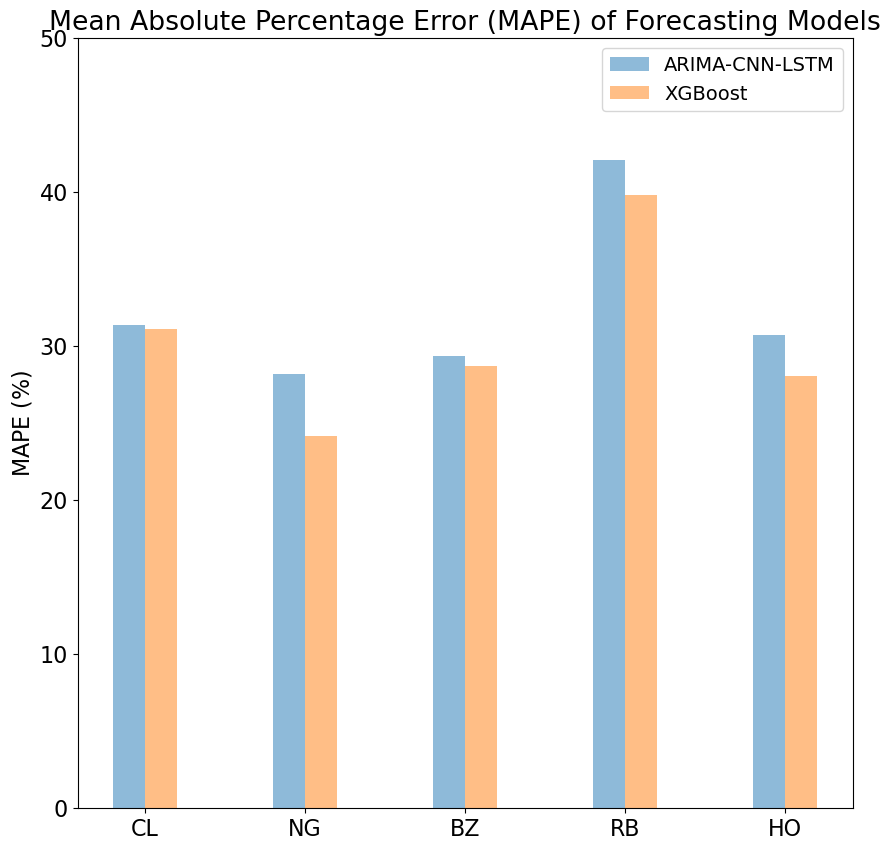

In [8]:
test_start_datetime = pd.Timestamp('2018-01-02')
fuel_futures_data = pd.read_parquet('../data/fuel_first_rate_data_R_prices.parquet')[test_start_datetime:]

arima_mapes = np.ones(len(fuel_futures))
cnn_lstm_mapes = np.ones(len(fuel_futures))
xgboost_mapes = np.ones(len(fuel_futures))

for i in range(len(fuel_futures)):
#     arima_preds = pd.read_csv(f'../ARIMA-saved-data/{fuel_futures[i]}.csv', parse_dates=True)
#     arima_preds['Datetime'] = pd.to_datetime(arima_preds['Datetime'])
#     arima_preds = arima_preds.set_index(['Datetime'])
    
    cnn_lstm_preds = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{fuel_futures[i]}_predictions.csv', parse_dates=True)
    cnn_lstm_preds['Datetime'] = pd.to_datetime(cnn_lstm_preds['Datetime'])
    cnn_lstm_preds = cnn_lstm_preds.set_index(['Datetime'])
    
    xgboost_preds = pd.read_csv(f'../ARIMA-XGBoost-saved-data/{fuel_futures[i]}_daily_predictions.csv', parse_dates=True)
    xgboost_preds['Datetime'] = pd.to_datetime(xgboost_preds['Datetime'])
    xgboost_preds = xgboost_preds.set_index(['Datetime'])
    
    fuel_actual = fuel_futures_data[fuel_futures[i]]
#     arima_mapes[i] = calculate_mape(fuel_actual, arima_preds)
    
    cnn_lstm_mapes[i] = calculate_mape(fuel_actual, cnn_lstm_preds)
    
    xgboost_mapes[i] = calculate_mape(fuel_actual, xgboost_preds)
    

print(cnn_lstm_mapes)
print(xgboost_mapes)    
plt.figure(figsize=(10,10))
y = np.arange(len(cnn_lstm_mapes))
# plt.bar(y, arima_mapes, align='center', alpha=0.5, width=0.4, label='ARIMA')
plt.bar(y-0.1, cnn_lstm_mapes, align='center', alpha=0.5, width=0.2, label='ARIMA-CNN-LSTM')
plt.bar(y+0.1, xgboost_mapes, align='center', alpha=0.5, width=0.2, label='XGBoost')
plt.legend()
plt.ylim(0,50)
plt.xticks(y, fuel_futures)
plt.ylabel('MAPE ($\%$)')
plt.title('Mean Absolute Percentage Error (MAPE) of Forecasting Models')
plt.show()

[18.89518251 31.60546272 13.96111852 12.69689617  8.67847601]
[18.80517737 31.47388319 13.95180847 12.65804712  8.67661988]


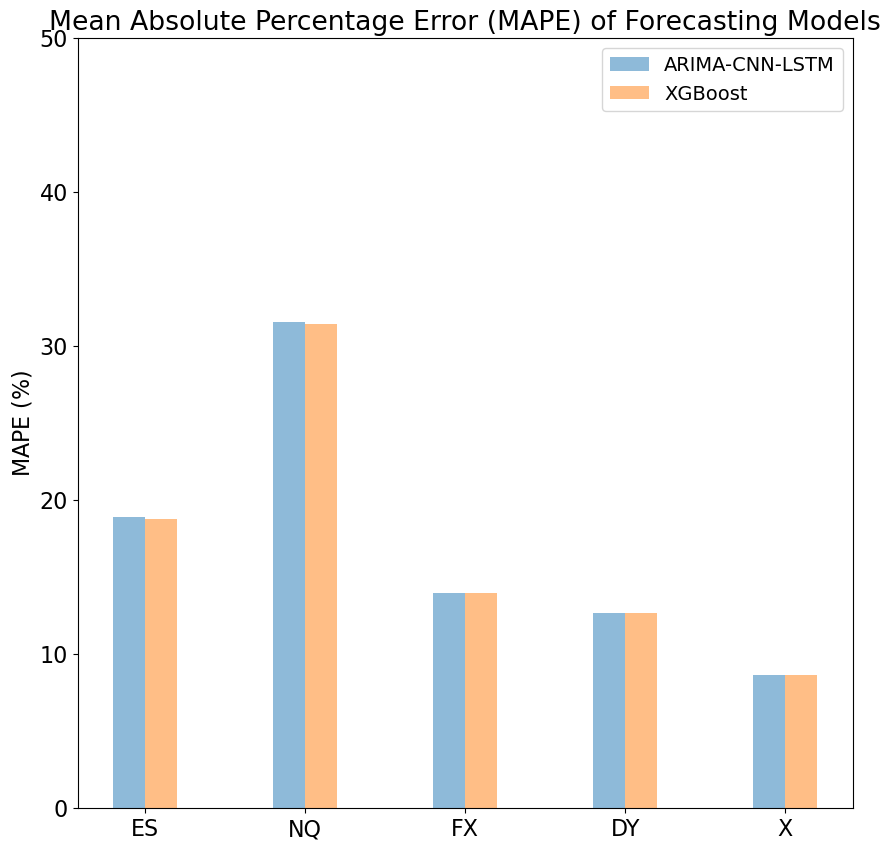

In [7]:
plt.rcParams.update({
    "font.size": 16,
    "legend.fontsize": 14
})


test_start_datetime = pd.Timestamp('2018-01-02')
equity_futures_data = pd.read_parquet('../data/equity_indices_first_rate_data_R_prices.parquet')[test_start_datetime:]

arima_mapes = np.ones(len(equity_futures))
cnn_lstm_mapes = np.ones(len(equity_futures))
xgboost_mapes = np.ones(len(equity_futures))

for i in range(len(equity_futures)):
#     arima_preds = pd.read_csv(f'../ARIMA-saved-data/{fuel_futures[i]}.csv', parse_dates=True)
#     arima_preds['Datetime'] = pd.to_datetime(arima_preds['Datetime'])
#     arima_preds = arima_preds.set_index(['Datetime'])
    
    cnn_lstm_preds = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{equity_futures[i]}_predictions.csv', parse_dates=True)
    cnn_lstm_preds['Datetime'] = pd.to_datetime(cnn_lstm_preds['Datetime'])
    cnn_lstm_preds = cnn_lstm_preds.set_index(['Datetime'])
    
    xgboost_preds = pd.read_csv(f'../ARIMA-XGBoost-saved-data/{equity_futures[i]}_daily_predictions.csv', parse_dates=True)
    xgboost_preds['Datetime'] = pd.to_datetime(xgboost_preds['Datetime'])
    xgboost_preds = xgboost_preds.set_index(['Datetime'])
    
    equity_actual = equity_futures_data[equity_futures[i]]
#     arima_mapes[i] = calculate_mape(fuel_actual, arima_preds)
    
    cnn_lstm_mapes[i] = calculate_mape(equity_actual, cnn_lstm_preds)
    
    xgboost_mapes[i] = calculate_mape(equity_actual, xgboost_preds)
    
print(cnn_lstm_mapes)
print(xgboost_mapes)
    
plt.figure(figsize=(10,10))
y = np.arange(len(cnn_lstm_mapes))
# plt.bar(y, arima_mapes, align='center', alpha=0.5, width=0.4, label='ARIMA')
plt.bar(y-0.1, cnn_lstm_mapes, align='center', alpha=0.5, width=0.2, label='ARIMA-CNN-LSTM')
plt.bar(y+0.1, xgboost_mapes, align='center', alpha=0.5, width=0.2, label='XGBoost')
plt.legend()
plt.ylim(0,50)
plt.xticks(y, equity_futures)
plt.ylabel('MAPE ($\%$)')
plt.title('Mean Absolute Percentage Error (MAPE) of Forecasting Models')
plt.show()